Multimage for the presentation 

In [1]:
#Load the ground data and the model outputs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature

quiet_event = 'G0H3-201804202100'
moderate_event = 'G2H12-201509071500'
storm_event = 'G4H12-202304231500'


jpld_path = '/mnt/ionosphere-data/presentations/pyiri_validation/'

# jpld_data_quiet_event = f'{quiet_event}/vtec_event_analysis/stacked_jpld_vtec_maps_{quiet_event}.npy'
# jpld_data_moderate_event = f'{moderate_event}/vtec_event_analysis/stacked_jpld_vtec_maps_{moderate_event}.npy'
# jpld_data_severe_event = f'{storm_event}/vtec_event_analysis/stacked_jpld_vtec_maps_{storm_event}.npy'

# quiet_jpld_data = np.load(jpld_path + jpld_data_quiet_event)
# moderate_jpld_data = np.load(jpld_path + jpld_data_moderate_event)
# severe_jpld_data = np.load(jpld_path + jpld_data_severe_event)


pyiri_data_quiet_event = f'{quiet_event}/vtec_event_analysis/stacked_pyiri_vtec_maps_{quiet_event}.npy'
pyiri_data_moderate_event = f'{moderate_event}/vtec_event_analysis/stacked_pyiri_vtec_maps_{moderate_event}.npy'
pyiri_data_severe_event = f'{storm_event}/vtec_event_analysis/stacked_pyiri_vtec_maps_{storm_event}.npy'

pyiri_quiet_data = np.load(jpld_path + pyiri_data_quiet_event)
pyiri_moderate_data = np.load(jpld_path + pyiri_data_moderate_event)
pyiri_severe_data = np.load(jpld_path + pyiri_data_severe_event)

print(f'Loaded PyIRI data shapes: Quiet {pyiri_quiet_data.shape}, Moderate {pyiri_moderate_data.shape}, Severe {pyiri_severe_data.shape}')

models_path = '/mnt/ionosphere-experiments/20250815-presentation/'

jpld_data_quiet_event = f'IonCastLSTM/test-fixed-lead-time-event-{quiet_event}-60min-original.npy'
jpld_data_moderate_event = f'IonCastLSTM/test-fixed-lead-time-event-{moderate_event}-60min-original.npy'
jpld_data_severe_event = f'IonCastLSTM/test-fixed-lead-time-event-{storm_event}-60min-original.npy'

quiet_jpld_data = np.load(models_path + jpld_data_quiet_event)
moderate_jpld_data = np.load(models_path + jpld_data_moderate_event)
severe_jpld_data = np.load(models_path + jpld_data_severe_event)

print(f'Loaded JPLD data shapes: Quiet {quiet_jpld_data.shape}, Moderate {moderate_jpld_data.shape}, Severe {severe_jpld_data.shape}')

quiet_LSTM_data_event = f'IonCastLSTM/test-fixed-lead-time-event-{quiet_event}-60min-forecast.npy'
moderate_LSTM_data_event = f'IonCastLSTM/test-fixed-lead-time-event-{moderate_event}-60min-forecast.npy'
severe_LSTM_data_event = f'IonCastLSTM/test-fixed-lead-time-event-{storm_event}-60min-forecast.npy'

LSTM_quiet_data = np.load(models_path + quiet_LSTM_data_event)
LSTM_moderate_data = np.load(models_path + moderate_LSTM_data_event)
LSTM_severe_data = np.load(models_path + severe_LSTM_data_event)


print(f'Loaded LSTM data shapes: Quiet {LSTM_quiet_data.shape}, Moderate {LSTM_moderate_data.shape}, Severe {LSTM_severe_data.shape}')

quiet_SFNO_data_event = f'SphericalFNO/test-fixed-lead-time-event-{quiet_event}-60min-forecast.npy'
moderate_SFNO_data_event = f'SphericalFNO/test-fixed-lead-time-event-{moderate_event}-60min-forecast.npy'
severe_SFNO_data_event = f'SphericalFNO/test-fixed-lead-time-event-{storm_event}-60min-forecast.npy'

SFNO_quiet_data = np.load(models_path + quiet_SFNO_data_event)
SFNO_moderate_data = np.load(models_path + moderate_SFNO_data_event)
SFNO_severe_data = np.load(models_path + severe_SFNO_data_event)

print(f'Loaded SFNO data shapes: Quiet {SFNO_quiet_data.shape}, Moderate {SFNO_moderate_data.shape}, Severe {SFNO_severe_data.shape}')

quiet_GNN_data_event = f'IonCastGNN/test-fixed-lead-time-event-{quiet_event}-60min-forecast.npy'
moderate_GNN_data_event = f'IonCastGNN/test-fixed-lead-time-event-{moderate_event}-60min-forecast.npy'
severe_GNN_data_event = f'IonCastGNN/test-fixed-lead-time-event-{storm_event}-60min-forecast.npy'

GNN_quiet_data = np.load(models_path + quiet_GNN_data_event)
GNN_moderate_data = np.load(models_path + moderate_GNN_data_event)
GNN_severe_data = np.load(models_path + severe_GNN_data_event)

print(f'Loaded GNN data shapes: Quiet {GNN_quiet_data.shape}, Moderate {GNN_moderate_data.shape}, Severe {GNN_severe_data.shape}')



#compute RMSE for each model and event and print a table

def compute_rmse(ground_truth, prediction):
    """Compute the Root Mean Square Error between ground truth and prediction."""
    return np.sqrt(np.mean(np.power((ground_truth.flatten() - prediction.flatten()),2)))

datasets = [
    ('PyIRI Quiet', pyiri_quiet_data),
    ('JPLD Quiet', quiet_jpld_data),
    ('LSTM Quiet', LSTM_quiet_data),
    ('SFNO Quiet', SFNO_quiet_data),
    ('GNN Quiet', GNN_quiet_data),
    ('PyIRI Moderate', pyiri_moderate_data),
    ('JPLD Moderate', moderate_jpld_data),
    ('LSTM Moderate', LSTM_moderate_data),
    ('SFNO Moderate', SFNO_moderate_data),
    ('GNN Moderate', GNN_moderate_data),
    ('PyIRI Severe', pyiri_severe_data),
    ('JPLD Severe', severe_jpld_data),
    ('LSTM Severe', LSTM_severe_data),
    ('SFNO Severe', SFNO_severe_data),
    ('GNN Severe', GNN_severe_data),
]

datasets_rmse = {}
for name, data in datasets:
    if 'Quiet' in name:
        gt = quiet_jpld_data
    elif 'Moderate' in name:
        gt = moderate_jpld_data
    elif 'Severe' in name:
        gt = severe_jpld_data
    else:
        continue  # Should not happen

    rmse = compute_rmse(gt, data)
    datasets_rmse[name] = rmse
    print(f'RMSE for {name}: {rmse:.2f}')

lat_size = quiet_jpld_data.shape[1]
lon_size = quiet_jpld_data.shape[2]
n_times = quiet_jpld_data.shape[0]

Loaded PyIRI data shapes: Quiet (49, 180, 360), Moderate (49, 180, 360), Severe (49, 180, 360)
Loaded JPLD data shapes: Quiet (49, 180, 360), Moderate (49, 180, 360), Severe (49, 180, 360)
Loaded LSTM data shapes: Quiet (49, 180, 360), Moderate (49, 180, 360), Severe (49, 180, 360)
Loaded SFNO data shapes: Quiet (49, 180, 360), Moderate (49, 180, 360), Severe (49, 180, 360)
Loaded GNN data shapes: Quiet (49, 180, 360), Moderate (49, 180, 360), Severe (49, 180, 360)
RMSE for PyIRI Quiet: 3.86
RMSE for JPLD Quiet: 0.00
RMSE for LSTM Quiet: 1.42
RMSE for SFNO Quiet: 1.70
RMSE for GNN Quiet: 2.84
RMSE for PyIRI Moderate: 6.95
RMSE for JPLD Moderate: 0.00
RMSE for LSTM Moderate: 3.02
RMSE for SFNO Moderate: 4.63
RMSE for GNN Moderate: 5.05
RMSE for PyIRI Severe: 16.01
RMSE for JPLD Severe: 0.00
RMSE for LSTM Severe: 6.71
RMSE for SFNO Severe: 19.89
RMSE for GNN Severe: 11.80


In [ ]:
print(datasets[0].shape)

In [2]:
# --------------------------------
# Geographic setup
# --------------------------------
lon = np.linspace(-180, 180, 360)
lat = np.linspace(90, -90, 180)
nrows, ncols = 3, 5
col_titles = ["SoTA IRI", "Ground truth JPLD", "IonCast LSTM", "IonCast SFNO", "IonCast GNN"]

GIF saved as tec_maps_grid.gif


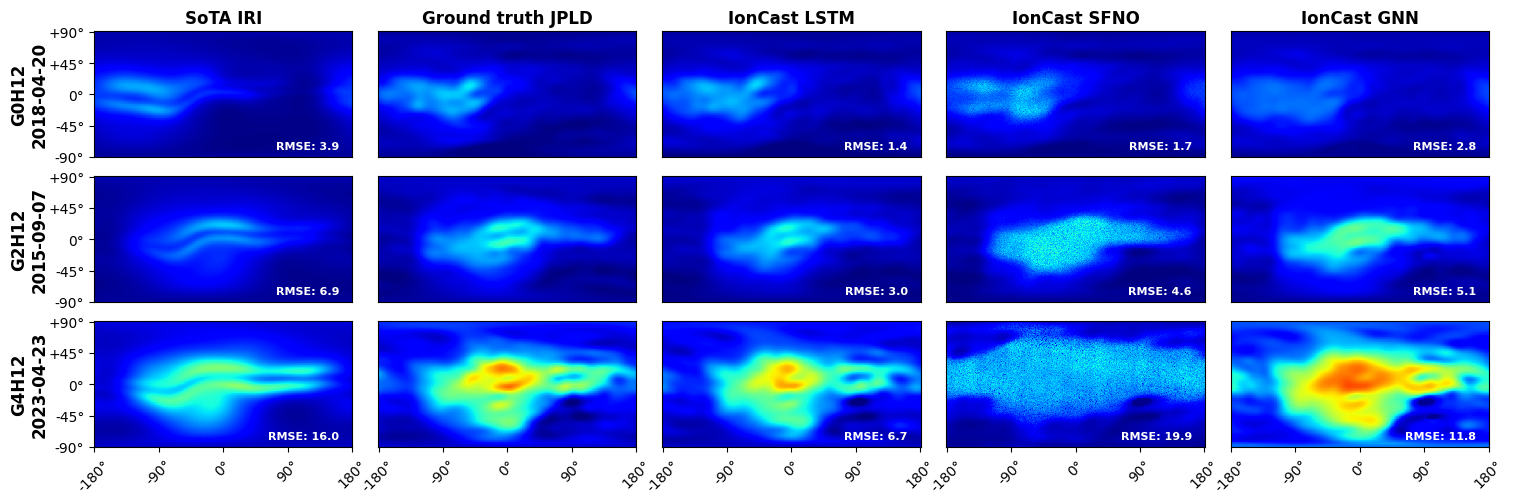

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio

vmin, vmax = 0, 120

# -----------------------------
# Create figure + subplots once
# -----------------------------
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5.4))
axes = axes.flatten()
pcm_list = []

event_labels = ['G0H12\n2018-04-20', 'G2H12\n2015-09-07', 'G4H12\n2023-04-23']

for idx, ax in enumerate(axes):
    vtec_map = datasets[idx][1][0]
    pcm = ax.pcolormesh(lon, lat, vtec_map, cmap='jet', vmin=vmin, vmax=vmax, shading='auto')
    pcm_list.append(pcm)

    # Titles for first row
    if idx < ncols:
        ax.set_title(col_titles[idx], fontsize=12, fontweight='bold')

    # Y-axis ticks for first column
    if idx % ncols == 0:
        ax.set_yticks([-90, -45, 0, 45, 90])
        ax.set_yticklabels(['-90°', '-45°', '0°', '+45°', '+90°'])

        row_idx = idx // ncols
        ax.text(-0.25, 0.5, event_labels[row_idx], rotation=90, va='center', ha='center',
                transform=ax.transAxes, fontsize=12, fontweight='bold')
    else:
        ax.set_yticks([])

    # X-axis ticks for last row
    if idx >= (nrows - 1) * ncols:
        ax.set_xticks([-180, -90, 0, 90, 180])
        ax.set_xticklabels(['-180°', '-90°', '0°', '90°', '180°'])
        ax.tick_params(axis='x', rotation=45)   
       
    else:
        ax.set_xticks([])


    #write RMSE in the bottom right corner for all columns except the second column
    if idx % ncols != 1:
        rmse_value = datasets_rmse[datasets[idx][0]]
        ax.text(0.95, 0.05, f'RMSE: {rmse_value:.1f}', transform=ax.transAxes,
                fontsize=8, color='white', ha='right', va='bottom', fontweight='bold')
    

# Shared colorbar
#fig.colorbar(pcm_list[0], ax=axes, orientation='vertical', fraction=0.025, pad=0.02).set_label('TEC (TECU)', fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.15)
#plt.tight_layout()

# -----------------------------
# Update function for animation
# -----------------------------
def update(frame_idx):
    for idx, pcm in enumerate(pcm_list):
        pcm.set_array(datasets[idx][1][frame_idx].ravel())
    #fig.suptitle(f"TEC Maps — {time_labels[frame_idx]}", fontsize=16)
    return pcm_list

# -----------------------------
# Create and save animation
# -----------------------------
ani = animation.FuncAnimation(fig, update, frames=n_times, interval=200, blit=False)
ani.save("tec_maps_grid.gif", writer='pillow', fps=4)
print("GIF saved as tec_maps_grid.gif")


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio




datasets = [
    ('PyIRI Quiet', pyiri_quiet_data),
    ('PyIRI Moderate', pyiri_moderate_data),
    ('PyIRI Severe', pyiri_severe_data),
    ('JPLD Quiet', quiet_jpld_data),
    ('JPLD Moderate', moderate_jpld_data),
    ('JPLD Severe', severe_jpld_data),
    ('LSTM Quiet', LSTM_quiet_data),
    ('LSTM Moderate', LSTM_moderate_data),
    ('LSTM Severe', LSTM_severe_data),
    ('SFNO Quiet', SFNO_quiet_data),
    ('SFNO Moderate', SFNO_moderate_data),
    ('SFNO Severe', SFNO_severe_data),
    ('GNN Quiet', GNN_quiet_data),
    ('GNN Moderate', GNN_moderate_data),
    ('GNN Severe', GNN_severe_data),
]

vmin, vmax = 0, 120

# -----------------------------
# Create figure + subplots once
# -----------------------------
fig, axes = plt.subplots(nrows, ncols, figsize=(10.5, 9))
axes = axes.flatten()
pcm_list = []

nrows, ncols = 5, 3
col_titles = ['G0H12\n2018-04-20', 'G2H12\n2015-09-07', 'G4H12\n2023-04-23']
event_labels =  ["SoTA IRI", "Ground truth JPLD", "IonCast LSTM", "IonCast SFNO", "IonCast GNN"]

for idx, ax in enumerate(axes):
    vtec_map = datasets[idx][1][0]
    pcm = ax.pcolormesh(lon, lat, vtec_map, cmap='jet', vmin=vmin, vmax=vmax, shading='auto')
    pcm_list.append(pcm)
    # Titles for first row
    if idx < ncols:
        ax.set_title(col_titles[idx], fontsize=12, fontweight='bold')
    # Y-axis ticks for first column
    if idx % ncols == 0:
        ax.set_yticks([-90, -45, 0, 45, 90])
        ax.set_yticklabels(['-90°', '-45°', '0°', '+45°', '+90°'])

        row_idx = idx // ncols
        ax.text(-0.25, 0.5, event_labels[row_idx], rotation=90, va='center', ha='center',
                transform=ax.transAxes, fontsize=12, fontweight='bold')
    else:
        ax.set_yticks([])
    # X-axis ticks for last row
    if idx >= (nrows - 1) * ncols:
        ax.set_xticks([-180, -90, 0, 90, 180])
        ax.set_xticklabels(['-180°', '-90°', '0°', '90°', '180°'])
    else:
        ax.set_xticks([])
# Shared colorbar
#fig.colorbar(pcm_list[0], ax=axes, orientation='vertical', fraction=0.025, pad=0.02).set_label('TEC (TECU)', fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.tight_layout()
# -----------------------------
# Update function for animation
# -----------------------------
def update(frame_idx):
    for idx, pcm in enumerate(pcm_list):
        pcm.set_array(datasets[idx][1][frame_idx].ravel())
    #fig.suptitle(f"TEC Maps — {time_labels[frame_idx]}", fontsize=16)
    return pcm_list
# -----------------------------
# Create and save animation
# -----------------------------
ani = animation.FuncAnimation(fig, update, frames=n_times, interval=200, blit=False)
ani.save("tec_maps_grid_transposed.gif", writer='pillow', fps=4)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation
import cartopy.crs as ccrs
import warnings
from apexpy import Apex

warnings.filterwarnings("ignore", message="invalid value encountered in linestrings")

# -----------------------------
# Load data
# -----------------------------
jpld_data_path = '//mnt/ionosphere-experiments/20250815-presentation/IonCastLSTM/'
G2H12_data = 'test-fixed-lead-time-event-G4H12-202304231500-60min-forecast.npy'
G2H12_start_time = pd.to_datetime('2023-04-23 15:00:00')

G2H12_jpld_data = np.load(jpld_data_path + G2H12_data) # shape: (time, lat, lon)


plt.style.use('dark_background')

import os, re
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
from skyfield.api import load, wgs84

# ----------------------------- CONFIG ---------------------------------------
MODEL_NPY = G2H12_jpld_data 
VTEC_VMIN, VTEC_VMAX = 0.0, 120.0
CMAP = "jet"                      # or "gist_ncar"
FRAME_CADENCE_MIN = 15.0          # << set your true per-frame cadence here
CAMERA_SPEEDUP = 1.0              # 1.0 = physical UT; >1.0 only for presentation

# --------------------------- TIME UTILITIES ---------------------------------
def parse_start_dt_from_name(path):
    fn = os.path.basename(path)
    m_dt = re.search(r"(\d{8})(\d{4})", fn)
    return pd.to_datetime(m_dt.group(1) + m_dt.group(2), format="%Y%m%d%H%M") if m_dt else None

# --------------------------- DATA LOADING -----------------------------------
def load_time_first(path):
    arr = np.load(path)
    if arr.ndim == 2:
        arr = arr[None, ...]
    elif arr.ndim == 3:
        Hcand, Wcand = 180, 360
        T_axis = None
        for ax in range(3):
            other = [i for i in range(3) if i != ax]
            if arr.shape[other[0]] == Hcand and arr.shape[other[1]] == Wcand:
                T_axis = ax; break
        if T_axis is None: T_axis = 0
        if T_axis != 0: arr = np.moveaxis(arr, T_axis, 0)
    elif arr.ndim == 4:
        spatial_axes = [i for i,s in enumerate(arr.shape) if s in (180,360)]
        if len(spatial_axes) >= 2:
            arr = np.moveaxis(arr, spatial_axes[:2], (-2, -1))
        T = int(np.prod(arr.shape[:-2])); arr = arr.reshape(T, arr.shape[-2], arr.shape[-1])
    else:
        raise ValueError(f"Unsupported array ndim={arr.ndim}")
    return arr

# --------------------------- ASTRONOMY HELPERS ------------------------------
ts = load.timescale(); eph = load('de421.bsp'); earth = eph['earth']; moon = eph['moon']

def get_subsolar_lon(dt):
    seconds = dt.hour*3600 + dt.minute*60 + dt.second
    return (seconds/86400.0)*360.0 - 180.0  # [-180,180)

def get_moon_lonlat(dt):
    t = ts.utc(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    subpoint = wgs84.subpoint(earth.at(t).observe(moon))
    lon = subpoint.longitude.degrees; lat = subpoint.latitude.degrees
    if lon > 180: lon -= 360
    if lon < -180: lon += 360
    return lon, lat

def wrap180(x): return ((x + 180) % 360) - 180

# ------------------------------- MAIN ---------------------------------------
data = MODEL_NPY  # (T,H,W)
T, H, W = data.shape
lats = np.linspace(87.5, -87.5, H)
lons = np.linspace(-180, 180, W)

start_dt =  G2H12_start_time

# real (physical) timestamps per frame (cadence you set)
dt_real = [start_dt + pd.Timedelta(minutes=FRAME_CADENCE_MIN*i) for i in range(T)]
# camera timestamps (optionally sped up for visual clarity)
dt_cam  = [start_dt + pd.Timedelta(minutes=(FRAME_CADENCE_MIN*CAMERA_SPEEDUP)*i) for i in range(T)]

# debug: how much subsolar long changes across the clip
ss0 = get_subsolar_lon(dt_cam[0]); ssN = get_subsolar_lon(dt_cam[-1])
print(f"[debug] frames={T}, cadence={FRAME_CADENCE_MIN} min, "
      f"subsolar start={ss0:.2f}°, end={ssN:.2f}°, change={wrap180(ssN-ss0):.2f}°")

fig = plt.figure(figsize=(16, 12)); plt.rcParams['animation.embed_limit'] = 50_000_000
PC = ccrs.PlateCarree()

def update(k):
    plt.clf()
    dt      = dt_real[k]   # data time (title)
    dt_view = dt_cam[k]    # camera time (rotation)
    vtec    = data[k]

    subsolar_lon = get_subsolar_lon(dt_view)
    nightside_lon = wrap180(subsolar_lon + 180)
    east_lon  = wrap180(subsolar_lon + 90)
    west_lon  = wrap180(subsolar_lon - 90)

    moon_lon, moon_lat = get_moon_lonlat(dt_view)
    moon_lon_sunlocked = wrap180(moon_lon - subsolar_lon)

    # Sun-facing
    ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(central_longitude=-subsolar_lon, central_latitude=0))
    ax2.set_global(); ax2.coastlines()
    m2 = ax2.pcolormesh(lons, lats, vtec, cmap=CMAP, vmin=VTEC_VMIN, vmax=VTEC_VMAX, shading='auto', transform=PC)
    ax2.set_title(f"Day", fontsize=18)

    # East limb (+6h)
    ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(central_longitude=-east_lon, central_latitude=0))
    ax1.set_global(); ax1.coastlines()
    m1 = ax1.pcolormesh(lons, lats, vtec, cmap=CMAP, vmin=VTEC_VMIN, vmax=VTEC_VMAX, shading='auto', transform=PC)
    ax1.set_title(f"Dawn", fontsize=18)

    # West limb (–6h)
    ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(central_longitude=-west_lon, central_latitude=0))
    ax3.set_global(); ax3.coastlines()
    m3 = ax3.pcolormesh(lons, lats, vtec, cmap=CMAP, vmin=VTEC_VMIN, vmax=VTEC_VMAX, shading='auto', transform=PC)
    ax3.set_title(f"Dusk", fontsize=18)

    # Nightside (+ sublunar marker in sun-locked coords)
    ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(central_longitude=-nightside_lon, central_latitude=0))
    ax4.set_global(); ax4.coastlines()
    m4 = ax4.pcolormesh(lons, lats, vtec, cmap=CMAP, vmin=VTEC_VMIN, vmax=VTEC_VMAX, shading='auto', transform=PC)
    #ax4.plot(moon_lon_sunlocked + nightside_lon, moon_lat, 'o', markersize=16, color='yellow',
    #         markeredgecolor='black', markeredgewidth=2, transform=PC)
    ax4.set_title(f"Night", fontsize=18)

    cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
    plt.colorbar(m1, cax=cbar_ax, orientation='horizontal', label='TEC (TECU)')
    fig.suptitle(f'IonCast LSTM | {dt.strftime("%Y-%m-%d %H:%M:%S UTC")}', fontsize=25)
    return [m1, m2, m3, m4]

out_gif = "TEC_model1_LSMT_Storm.gif"
ani = animation.FuncAnimation(fig, update, frames=T, interval=150, blit=False)
ani.save(out_gif, writer='pillow', fps=6)
print(f"Saved {out_gif}")


In [ ]:
import matplotlib.colors as mcolors
import pickle
import numpy as np
import matplotlib.pyplot as plt
import io
import tarfile
import os
import pandas as pd
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from apexpy import Apex
import warnings

warnings.filterwarnings("ignore", message="invalid value encountered in linestrings")

# --- Load indices ---
dates_index_path = "/mnt/ionosphere-data/jpld/webdataset/dates_index_2010-05-13T00:00:00_2024-07-31T23:45:00"
tar_index_path = "/mnt/ionosphere-data/jpld/webdataset/tar_files_index"
with open(dates_index_path, "rb") as f:
    dates_index = pickle.load(f)
with open(tar_index_path, "rb") as f:
    tar_files_index = pickle.load(f)

def datetime_to_key(dt):
    return dt.strftime("%Y/%m/%d/%H%M.tecmap.npy")

def patch_tar_path(path):
    return os.path.join("/mnt/ionosphere-data/jpld/webdataset", os.path.basename(path))

def nearest_key(requested_dt):
    key = datetime_to_key(requested_dt)
    if key in tar_files_index:
        return key, requested_dt
    keys = list(tar_files_index.keys())
    key_times = [pd.to_datetime(k[:16], format="%Y/%m/%d/%H%M") for k in keys]
    idx = np.argmin(np.abs([(t - requested_dt).total_seconds() for t in key_times]))
    return keys[idx], key_times[idx]

def load_vtec_arr(dt):
    key, used_dt = nearest_key(dt)
    tar_path, tarinfo = tar_files_index[key]
    local_tar_path = patch_tar_path(tar_path)
    with tarfile.open(local_tar_path, "r") as tar:
        file_obj = tar.extractfile(tarinfo)
        array_bytes = file_obj.read()
    vtec_arr = np.load(io.BytesIO(array_bytes))
    return vtec_arr, used_dt

def get_subsolar_lon(dt):
    seconds = dt.hour*3600 + dt.minute*60 + dt.second
    return (seconds / 86400.0)*360.0 - 180.0

# --- Setup lat/lon grid ---
vtec_sample, _ = load_vtec_arr(pd.to_datetime("2024-05-10T00:00:00"))
nlat, nlon = vtec_sample.shape
lats = np.linspace(87.5, -87.5, nlat)
lons = np.linspace(-180, 180, nlon)

qd_lats = np.arange(-75, 91, 15)
qd_lons = np.arange(-180, 181, 30)

def clean_line_for_plotting(glon, glat, lat_limit=86.5):
    mask = (np.abs(glat) < lat_limit) & np.isfinite(glon) & np.isfinite(glat)
    glon = np.where(mask, glon, np.nan)
    glat = np.where(mask, glat, np.nan)
    dlon = np.abs(np.diff(glon))
    jumps = np.where(dlon > 40)[0]
    glon = glon.copy()
    glat = glat.copy()
    for j in jumps:
        glon[j+1] = np.nan
        glat[j+1] = np.nan
    return glon, glat

def plot_qd_grid(ax, apex, alpha=0.45, lw=1.0, zorder=10):
    # QD Longitude lines (verticals)
    for qdlon in qd_lons:
        qdlat = np.linspace(-86, 86, 441)
        qdlon_ = np.full_like(qdlat, qdlon)
        glat, glon, _ = apex.qd2geo(qdlat, qdlon_, 110)
        glon, glat = clean_line_for_plotting(glon, glat)
        norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-180, vmax=180)
        color = plt.cm.seismic(norm(qdlon))
        ax.plot(glon, glat, color=color, lw=lw, alpha=alpha, transform=ccrs.PlateCarree(), zorder=zorder)
    # QD Latitude lines (horizontals)
    for qdlat in qd_lats:
        qdlon = np.linspace(-180, 180, 1081)
        qdlat_ = np.full_like(qdlon, qdlat)
        glat, glon, _ = apex.qd2geo(qdlat_, qdlon, 110)
        glon, glat = clean_line_for_plotting(glon, glat)
        norm = mcolors.TwoSlopeNorm(vcenter=0, vmin=-90, vmax=90)
        color = plt.cm.seismic(norm(qdlat))
        ax.plot(glon, glat, color=color, lw=lw, alpha=alpha, transform=ccrs.PlateCarree(), zorder=zorder)

def wrap180(x):
    return ((x + 180) % 360) - 180

# --- Animation setup ---
start_dt = pd.to_datetime("2024-05-10T00:00:00")
n_steps = 48 * 4 + 1
dt_list = [start_dt + pd.Timedelta(minutes=15)*i for i in range(n_steps)]
vtec_vmin, vtec_vmax = 0, 120
plt.rcParams['animation.embed_limit'] = 50_000_000
fig = plt.figure(figsize=(16, 12))

def update(frame_idx):
    fig.clf()
    dt = dt_list[frame_idx]
    vtec_arr, used_dt = load_vtec_arr(dt)
    subsolar_lon = get_subsolar_lon(used_dt)
    nightside_lon = wrap180(subsolar_lon + 180)
    east_lon = wrap180(subsolar_lon + 90)
    west_lon = wrap180(subsolar_lon - 90)

    # Sun-facing
    ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(central_longitude=-subsolar_lon, central_latitude=0))
    ax1.set_global(); ax1.coastlines(linewidth=0.7)
    mesh1 = ax1.pcolormesh(lons, lats, vtec_arr, cmap='jet', vmin=vtec_vmin, vmax=vtec_vmax,
                           shading='auto', alpha=0.82, transform=ccrs.PlateCarree(), zorder=3)
    apex1 = Apex(dt.year + (dt.timetuple().tm_yday - 1)/365.25, refh=110)
    plot_qd_grid(ax1, apex1, alpha=0.48, lw=1.05, zorder=10)
    ax1.set_title(f"Sun-facing (Subsolar)\nLon: {subsolar_lon:.1f}°", fontsize=15)

    # East limb (+6h)
    ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(central_longitude=-east_lon, central_latitude=0))
    ax2.set_global(); ax2.coastlines(linewidth=0.7)
    mesh2 = ax2.pcolormesh(lons, lats, vtec_arr, cmap='jet', vmin=vtec_vmin, vmax=vtec_vmax,
                           shading='auto', alpha=0.82, transform=ccrs.PlateCarree(), zorder=3)
    apex2 = Apex(dt.year + (dt.timetuple().tm_yday - 1)/365.25, refh=110)
    plot_qd_grid(ax2, apex2, alpha=0.48, lw=1.05, zorder=10)
    ax2.set_title(f"East Limb (+6h)\nLon: {east_lon:.1f}°", fontsize=15)

    # West limb (-6h)
    ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(central_longitude=-west_lon, central_latitude=0))
    ax3.set_global(); ax3.coastlines(linewidth=0.7)
    mesh3 = ax3.pcolormesh(lons, lats, vtec_arr, cmap='jet', vmin=vtec_vmin, vmax=vtec_vmax,
                           shading='auto', alpha=0.82, transform=ccrs.PlateCarree(), zorder=3)
    apex3 = Apex(dt.year + (dt.timetuple().tm_yday - 1)/365.25, refh=110)
    plot_qd_grid(ax3, apex3, alpha=0.48, lw=1.05, zorder=10)
    ax3.set_title(f"West Limb (–6h)\nLon: {west_lon:.1f}°", fontsize=15)

    # Nightside
    ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(central_longitude=-nightside_lon, central_latitude=0))
    ax4.set_global(); ax4.coastlines(linewidth=0.7)
    mesh4 = ax4.pcolormesh(lons, lats, vtec_arr, cmap='jet', vmin=vtec_vmin, vmax=vtec_vmax,
                           shading='auto', alpha=0.82, transform=ccrs.PlateCarree(), zorder=3)
    apex4 = Apex(dt.year + (dt.timetuple().tm_yday - 1)/365.25, refh=110)
    plot_qd_grid(ax4, apex4, alpha=0.48, lw=1.05, zorder=10)
    ax4.set_title(f"Nightside (Opposite)\nLon: {nightside_lon:.1f}°", fontsize=15)

    # --- Shared colorbar below all plots ---
    cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
    cb = plt.colorbar(mesh1, cax=cbar_ax, orientation='horizontal', label='VTEC (TECU)')
    fig.suptitle(f'VTEC + Quasi-Dipole Grid (colored by QD value)\n{used_dt:%Y-%m-%d %H:%M UTC}', fontsize=22)
    plt.tight_layout(rect=[0, 0.07, 1, 0.96])
    return [mesh1, mesh2, mesh3, mesh4]

ani = animation.FuncAnimation(fig, update, frames=len(dt_list), interval=120, blit=False)
ani.save('May102024vtec_QD_4panel_sunlocked.gif', writer='pillow', fps=6)
print("Saved April92024vtec_QD_4panel_sunlocked.gif")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Dummy data
lon = np.linspace(-180, 180, 361)
lat = np.linspace(-90, 90, 181)
lon2d, lat2d = np.meshgrid(lon, lat)
vtec_map = np.random.rand(len(lat), len(lon)) * 120
time_datetimes = [f"2025-08-13 {hour:02d}:00" for hour in range(15)]

# Grid size
nrows, ncols = 3, 5

# Create grid
fig, axes = plt.subplots(
    nrows, ncols,
    figsize=(18, 5.4),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

axes = axes.flatten()

for idx, ax in enumerate(axes):
    tec_plot = ax.pcolormesh(
        lon, lat, vtec_map,
        cmap='jet', vmin=0, vmax=120, shading='auto'
    )
    ax.coastlines()
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
    ax.set_title(f'TEC Map on {time_datetimes[idx]} UTC', fontsize=9)

    # # Show ticks only for first column (y-axis) and last row (x-axis)
    # row, col = divmod(idx, ncols)
    # if col == 0:
    #     ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    #     ax.yaxis.set_major_formatter(
    #         plt.FuncFormatter(lambda y, _: f'{int(y)}°N' if y > 0 else f'{int(-y)}°S')
    #     )
    # else:
    #     ax.set_yticks([])

    # if row == nrows - 1:
    #     ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    #     ax.xaxis.set_major_formatter(
    #         plt.FuncFormatter(lambda x, _: f'{int(x)}°E' if x > 0 else f'{int(-x)}°W')
    #     )
    # else:
    #    ax.set_xticks([])

    # Show ticks only for first column (y-axis) and last row (x-axis)
    row, col = divmod(idx, ncols)

    # Y-axis ticks for first column
    if col == 0:
        ax.set_yticks([90, 45, 0, -45, -90], crs=ccrs.PlateCarree())
        ax.yaxis.set_major_formatter(
            plt.FuncFormatter(
                lambda y, _: (
                    f'{abs(int(y))}°N' if y > 0 else 
                    ('0°' if y == 0 else f'{abs(int(y))}°S')
                )
            )
        )
    else:
        ax.set_yticks([])

    # X-axis ticks for last row
    if row == nrows - 1:
        ax.set_xticks([-180, -90, 0, 90, 180], crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(
            plt.FuncFormatter(
                lambda x, _: (
                    f'{abs(int(x))}°E' if x > 0 else 
                    ('0°' if x == 0 else f'{abs(int(x))}°W')
                )
            )
        )


    else:
        ax.set_xticks([])




# Reduce space between rows and columns
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# Add one shared colorbar
# cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
# cbar = fig.colorbar(tec_plot, cax=cbar_ax, orientation='vertical')
# cbar.set_label('TEC (TECU)', fontsize=14)
# cbar.ax.tick_params(labelsize=12)

plt.show()